In [2]:
import glob, sys
import numpy as np
import matplotlib.pyplot as plt
import time
import pyccl as ccl
cosmo = ccl.Cosmology(Omega_c = 0.30711 - 0.048254, Omega_b = 0.048254, h = 0.677, sigma8 = 0.8288, n_s=0.96)

In [3]:
%load_ext autoreload
%autoreload 2
import CL_COUNT_class_cluster_abundance as cl_count

initialize the `ClusterAbundance` object

In [4]:
clc = cl_count.ClusterAbundance()
#choose the halo mass function and mass definition
massdef = ccl.halos.massdef.MassDef(200, 'critical', c_m_relation=None)
hmd = ccl.halos.hmfunc.MassFuncTinker08(cosmo, mass_def=massdef)
clc.set_cosmology(cosmo = cosmo, hmd = hmd, massdef = massdef)
clc.sky_area = (0.25)*4*np.pi

# Binned approach
Compute the 2D integral

$$
N_{\alpha\beta}^{\rm predicted} = \Omega_s\int_{z_\alpha}^{z_{\alpha + 1}} dz\int_{\log_{10}M_\beta}^{\log_{10}M_{\beta + 1}}\frac{d^2V(z)}{dz d\Omega}\frac{dn(M,z)}{d\log_{10}M}d\log_{10}M
$$

define mass & redshift binning

In [5]:
z_edges = np.linspace(0.25, 1.5, 11)
logm_edges = np.linspace(14, 15, 11)

Three different methods:
1. Simpson integration of a tabulated grid of $\Omega\frac{d^2V(z)}{dz d\Omega}\frac{dn(M,z)}{d\log_{10}M}$ (method `grid`)
2. Double integral using `scipy.integrate.dblquad` over a interpolated function based on a tabulated grid of $\Omega\frac{d^2V(z)}{dz d\Omega}\frac{dn(M,z)}{d\log_{10}M}$ (method `interp`)
3. Double integral using `scipy.integrate.dblquad` of $\Omega\frac{d^2V(z)}{dz d\Omega}\frac{dn(M,z)}{d\log_{10}M}$ (method `exact`)

# Mass-z

In [6]:
#define redshift-mass grid
z_grid = np.linspace(0., 3, 500)
logm_grid = np.linspace(12,16, 500)

`grid`

In [17]:
t0 = time.time()
clc.compute_multiplicity_grid_MZ(z_grid = z_grid, logm_grid = logm_grid)
Abundance_grid = clc.Cluster_Abundance_MZ(zbin_edges = z_edges, proxybin_edges = logm_edges, method = 'grid')
t1 = time.time()
print('time (seconds) = ' + str(t1-t0))
time_simps = t1-t0

time (seconds) = 0.5833501815795898


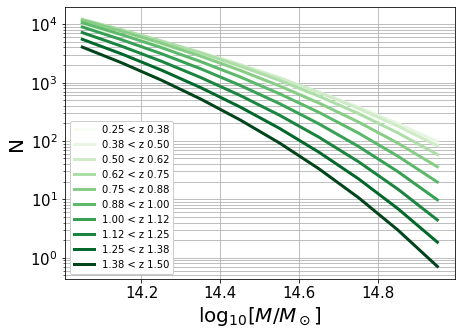

In [19]:
import matplotlib.pylab as pl
plt.figure(figsize = (7,5))
colors = plt.cm.get_cmap('Greens', len(z_edges)-1)

for i in np.arange(len(z_edges)-1):
    logmmean = [np.mean([logm_edges[i],logm_edges[i+1]]) for i in np.arange(len(logm_edges)-1)]  
    plt.plot(logmmean, Abundance_grid[i,:], label = f'{z_edges[i]:.2f} < z {z_edges[i+1]:.2f}', c = colors(i), linewidth = 3)
plt.yscale('log')
plt.xlabel(r'$\log_{10}[M/M_\odot]$', fontsize = 20)
plt.ylabel('N', fontsize = 20)
plt.legend(frameon = True, framealpha = 1)
plt.grid(True, which="both" )
plt.tick_params(axis='both', which="both", labelsize= 15)